# Data Analytics for the Corpus

## Author: Amittai Siavava

### Load the CSV metadata

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [6]:
df = pd.read_csv("index.csv")
df.dropna(inplace=True)
df.head(20)


,id,year,title,url,text
0,0,2023.0,"""MIT Technology Review""","""https://www.technologyreview.com""","""Featured Topics Newsletters Events Podcasts F..."
1,1,2023.0,"""WIRED - The Latest in Technology, Science, Cu...","""https://www.wired.com""","""Open Navigation Menu To revisit this article,..."
2,2,2019.0,"""The Verge""","""https://www.theverge.com""","""The Verge homepage The Verge The Verge logo.\..."
3,3,2023.0,"""TechCrunch | Startup and Technology News""","""https://www.techcrunch.com""","""WeWork reportedly on the verge of filing for ..."
4,4,2022.0,"""A new vision of artificial intelligence for t...","""https://www.technologyreview.com/2022/04/22/1...","""Featured Topics Newsletters Events Podcasts A..."
5,5,2022.0,"""The scientist who co-created CRISPR isn’t rul...","""https://www.technologyreview.com/2022/04/26/1...","""Featured Topics Newsletters Events Podcasts F..."
6,6,2022.0,"""These fast, cheap tests could help us coexist...","""https://www.technologyreview.com/2022/04/27/1...","""Featured Topics Newsletters Events Podcasts F..."
7,7,2022.0,"""Tackling multiple tasks with a single visual ...","""http://www.deepmind.com/blog/tackling-multipl...","""DeepMind Search Search Close DeepMind About O..."
8,8,2019.0,"""About - Google DeepMind""","""https://www.deepmind.com/about""","""DeepMind Search Search Close DeepMind About O..."
9,9,2023.0,"""Blog - Google DeepMind""","""https://www.deepmind.com/blog-categories/appl...","""DeepMind Search Search Close DeepMind About O..."


unique_years = [2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


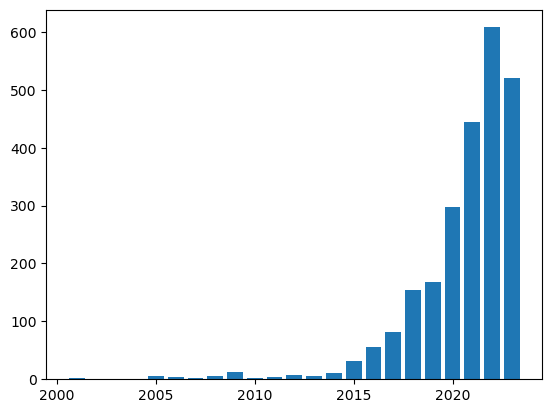

[1950 = 0] [1951 = 0] [1952 = 0] [1953 = 0] [1954 = 0] [1955 = 0] [1956 = 0] [1957 = 0] [1958 = 0] [1959 = 0] [1960 = 0] [1961 = 0] [1962 = 0] [1963 = 0] [1964 = 0] [1965 = 0] [1966 = 0] [1967 = 0] [1968 = 0] [1969 = 0] [1970 = 0] [1971 = 0] [1972 = 0] [1973 = 0] [1974 = 0] [1975 = 0] [1976 = 0] [1977 = 0] [1978 = 0] [1979 = 0] [1980 = 0] [1981 = 0] [1982 = 0] [1983 = 0] [1984 = 0] [1985 = 0] [1986 = 0] [1987 = 0] [1988 = 0] [1989 = 0] [1990 = 0] [1991 = 0] [1992 = 0] [1993 = 0] [1994 = 0] [1995 = 0] [1996 = 0] [1997 = 0] [1998 = 0] [1999 = 0] [2000 = 0] [2001 = 3] [2002 = 0] [2003 = 1] [2004 = 1] [2005 = 6] [2006 = 4] [2007 = 3] [2008 = 5] [2009 = 12] [2010 = 3] [2011 = 4] [2012 = 8] [2013 = 6] [2014 = 10] [2015 = 31] [2016 = 56] [2017 = 82] [2018 = 155] [2019 = 168] [2020 = 297] [2021 = 445] [2022 = 608] [2023 = 521] 

In [11]:
# df = pd.read_csv("index.csv")
# df.head()


data = np.array(df)
years = data[:, 1]

for i in range(len(years)):
  try:
    years[i] = int(years[i])
  except ValueError:
    continue

years = [year for year in years if isinstance(year, int) and 2000 <= year <= 2024 ]
counters = Counter(years)
unique_years = sorted(list(counters.keys()))
print(f"{unique_years = }")
counts = [counters[year] for year in unique_years]
plt.bar(unique_years, counts, label="Total")
plt.show()
with open("counts.csv", "w") as f:
  for year in range(1950, 2024):
    count = counters.get(year, 0)
    print(f"[{year} = {count}]", end=" ")
    f.write(f"{year},{count}\n")
